In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [182]:
dataset = "birds"
record_list = []
data_list = []
for file in os.walk(".\\"):
    results = [f for f in file[2] if ".npy" in f]
    if results != []:
        directory = file[0]
        for result in results:
            if dataset in result:
                data_list.append(np.load(directory+"\\"+result))
                record_list.append(directory+"\\"+result)

In [183]:
columns = [i.split("\\")[-1][:-4] for i in record_list]

In [184]:
largest_record = max(map(lambda x:len(x),data_list))

ValueError: max() arg is an empty sequence

In [185]:
df = pd.DataFrame(columns=columns)

In [177]:
for count,record in enumerate(record_list):
    data = np.load(record)
    df.iloc[:,count] = np.pad(data,(0,largest_record-len(data)),"constant")

In [178]:
df = df.replace({0:np.nan})

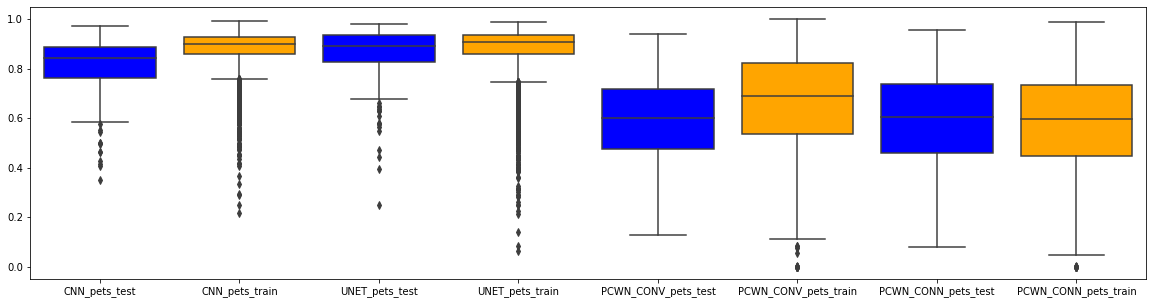

In [180]:
plt.rcParams["figure.figsize"] = (20,5)
ax = sns.boxplot(data=df)

for i in range(0,len(df.columns),2) :
    ax.artists[i].set_facecolor('blue')
    ax.artists[i+1].set_facecolor('orange')

In [171]:
df.describe()

,CNN_pets_test,CNN_pets_train,UNET_pets_train,PCWN_CONV_pets_test,PCWN_CONV_pets_train,PCWN_CONN_pets_test,PCWN_CONN_pets_train
count,300.000000,7035.000000,7035.000000,300.000000,7049.000000,300.000000,7049.000000
mean,0.812959,0.884539,0.885259,0.589416,0.670238,0.591932,0.585133
std,0.107630,0.067144,0.087213,0.175755,0.196606,0.195806,0.194124
min,0.349262,0.214837,0.063370,0.125725,0.000074,0.079583,0.000072
25%,0.764364,0.859777,0.861670,0.473491,0.534269,0.458168,0.445304
50%,0.842203,0.899211,0.909236,0.601752,0.690782,0.603471,0.596824
75%,0.887165,0.927762,0.938416,0.719714,0.823546,0.737585,0.734592
max,0.974379,0.994159,0.990588,0.939294,0.999542,0.957976,0.988746
